# Creating your own dataset from Images Pulled From eBay

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

I followed along in [lesson2-download.ipynb](lesson2-download.ipynb) and last week I did some work trying to duplicate it building a classifier from Google images to try to distinguish coins from Canada, the US and and UK.  I captured the effort here [lesson2-download-DanDouglas-CoinsFromGoogle.ipynb](lesson2-download-DanDouglas-CoinsFromGoogle.ipynb).   However, I didn't have much success doing it that way.  I believe that that was due to the fact that the images were just too noisy. 

After relection, I decided to use a different source for the data.  I went to [eBay](https://www.ebay.com) browsed categories of listings of the coins for sale.  The marketplace already had the coins classified, and the listing thumbnail pictures were good closeups of coins that should work better.   I adapted the JavaScript console method of URL capture to work with those pages (details below) and went at it.

In [1]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

eBay's marketplace has a rich category tree and sellers categorize their listings when they are created to make them easier to find.  

* US Coins - [https://www.ebay.com/sch/253/i.html?_from=R40&_nkw=coins](https://www.ebay.com/sch/253/i.html?_from=R40&_nkw=coins)
* UK Coins - [https://www.ebay.com/sch/3394/i.html?_from=R40&_nkw=coins](https://www.ebay.com/sch/3394/i.html?_from=R40&_nkw=coins)
* Canada Coins - [https://www.ebay.com/sch/3377/i.html?_from=R40&_nkw=coins](https://www.ebay.com/sch/3377/i.html?_from=R40&_nkw=coins)
* Austrialia Coins - [https://www.ebay.com/sch/45142/i.html?_from=R40&_nkw=coins](https://www.ebay.com/sch/45142/i.html?_from=R40&_nkw=coins)

You can set the page to show a galary view and set the most images per page that you can, for me that was 192.



### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands.

After some trial and error changing up the original and experimenting with different selectors, I hit up this set of commands to get URLs from the pages downloaded in to a file 

```javascript
urls = Array.from(document.querySelectorAll('.s-item__image-img')).map(el=>el.src)
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

This finds all the elements in the document with CSS class `s-item__image-img` and extracts the `src=` attribute, one pre line in a downloaded `.csv` file.

Once the files were downloaded, I used a full featured text editor ([TextMate](https://macromates.com/)) to remove duplicates and any munged lines.   I also changed the format of the returned impages from `.webp` to `.jpeg`.

When I was done, I had 4 files with the following number of lines

* australia-coins.txt   1063
* united_kingdom-coins.txt 859
* united_states-coins.txt 961
* canada-coins.txt 1089



### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [16]:
folder = 'australia'
file = 'australia-coins.txt'

In [2]:
folder = 'united_kingdom'
file = 'united_kingdom-coins.txt'

In [2]:
folder = 'united_states'
file = 'united_states-coins.txt'

In [27]:
folder = 'canada'
file = 'canada-coins.txt'

You will need to run this cell once per each category.

In [2]:
path = Path('data/coins-ebay')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NameError: name 'folder' is not defined

In [3]:
path.ls()

[PosixPath('data/coins-ebay/united_states'),
 PosixPath('data/coins-ebay/united_kingdom'),
 PosixPath('data/coins-ebay/canada'),
 PosixPath('data/coins-ebay/export.pkl'),
 PosixPath('data/coins-ebay/united_kingdom-coins.txt'),
 PosixPath('data/coins-ebay/cleaned.csv'),
 PosixPath('data/coins-ebay/.ipynb_checkpoints'),
 PosixPath('data/coins-ebay/united_states-coins.txt'),
 PosixPath('data/coins-ebay/australia'),
 PosixPath('data/coins-ebay/canada-coins.txt'),
 PosixPath('data/coins-ebay/models'),
 PosixPath('data/coins-ebay/australia-coins.txt')]

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [5]:
classes = ['australia','united_kingdom','united_states', 'canada']

In [6]:
download_images(path/file, dest, max_pics=859)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1000)

australia


united_kingdom


united_states


canada


## View data

In [8]:
#np.random.seed(42)
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
# If you already cleaned your data, run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [34]:
data.classes

['australia', 'canada', 'united_kingdom', 'united_states']

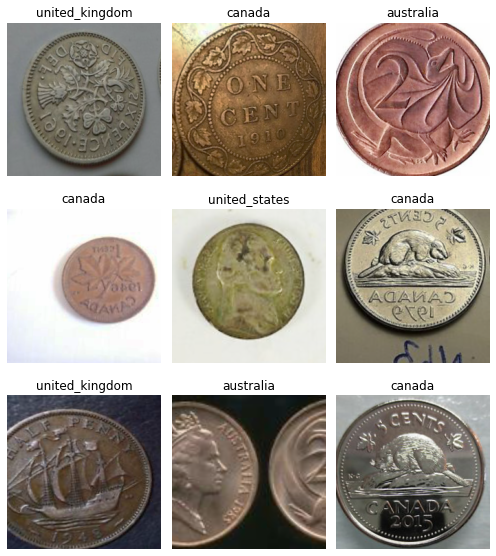

In [35]:
data.show_batch(rows=3, figsize=(7,8))

In [36]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['australia', 'canada', 'united_kingdom', 'united_states'], 4, 2719, 679)

## Train model

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.460746,0.828140,0.263623,00:09
1,1.022243,0.617140,0.204713,00:09
2,0.752583,0.547246,0.189985,00:09
3,0.598673,0.524936,0.182622,00:09


In [39]:
learn.save('stage-1')

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


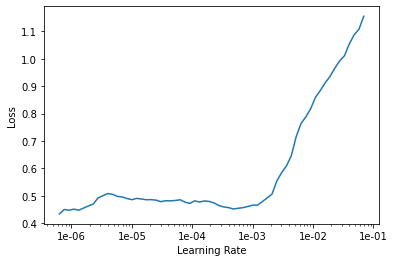

In [42]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.365882,0.450339,0.160530,00:10
1,0.338554,0.424721,0.148748,00:09
2,0.300554,0.396496,0.139912,00:09
3,0.262619,0.385493,0.139912,00:10
4,0.220186,0.379798,0.132548,00:09
5,0.212847,0.376416,0.131075,00:09


In [45]:
learn.save('stage-2')

## Interpretation

In [6]:
learn.load('stage-2');

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

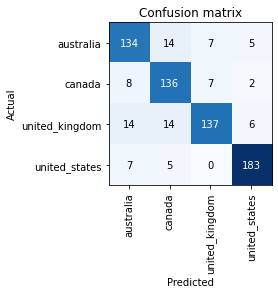

In [8]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [23]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [24]:
#db = (ImageList.from_folder(path)
#                   .split_none()
#                   .label_from_folder()
#                   .transform(get_transforms(), size=224)
#                   .databunch()
#     )

In [30]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

Then we create a new learner to use our new databunch with all the images.

In [31]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [26]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [27]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [28]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [29]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [16]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [10]:
defaults.device = torch.device('cpu')

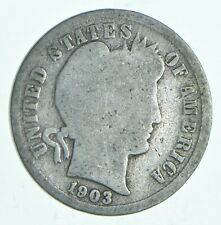

In [14]:
img = open_image(path/'united_states'/'00000014.jpeg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [12]:
learn = load_learner(path)

In [15]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category united_states

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)